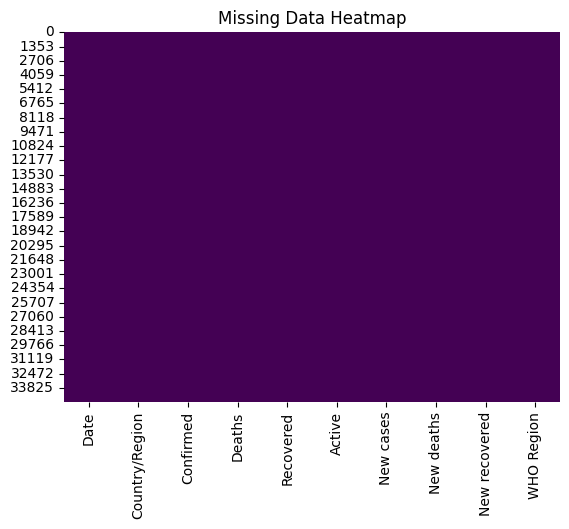

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('full_grouped.csv')

# Check missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Heatmap')
plt.show()


In [7]:
print(df.columns)


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [8]:
df.rename(columns={'Country/Region': 'Country'}, inplace=True)


In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv('country_wise_latest.csv')

# Print column names
print(df.columns)


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [11]:
df.rename(columns={'Country/Region': 'Country'}, inplace=True)


In [12]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print(df.columns)


Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [19]:
pip install dash


In [17]:
import sys
!{sys.executable} -m pip install dash pandas plotly


In [18]:
import dash
import pandas as pd
import plotly.express as px
print("Libraries are installed correctly!")


Libraries are installed correctly!


In [20]:
!pip install dash pandas plotly


In [23]:
!pip install pyngrok


In [27]:

ngrok.set_auth_token("2qIqHbvZzkxzpHOJHsv3pMVN1dT_7pg68XT5Qjud2ZXKoUK1x")  # Replace with your actual ngrok authtoken


In [32]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px
from pyngrok import ngrok
from dash.dependencies import Input, Output

# Load the dataset
df = pd.read_csv('full_grouped.csv')  # Adjust to your dataset path

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("COVID-19 Dashboard", style={'text-align': 'center'}),

    # Dropdown for selecting WHO region
    html.Div([
        html.Label("Select WHO Region:"),
        dcc.Dropdown(
            id="region_dropdown",
            options=[{"label": region, "value": region} for region in df["WHO Region"].unique()],
            value="Europe",  # Default value
        ),
    ]),

    # Graph for confirmed cases
    dcc.Graph(id="cases_graph"),
])

# Callback to update the graph based on dropdown selection
@app.callback(
    Output("cases_graph", "figure"),
    [Input("region_dropdown", "value")]
)
def update_graph(selected_region):
    filtered_df = df[df["WHO Region"] == selected_region]
    fig = px.choropleth(filtered_df,
                        locations="Country/Region",
                        locationmode="country names",
                        color="Confirmed",
                        hover_name="Country/Region",
                        color_continuous_scale="Reds",
                        title=f"COVID-19 Total Cases in {selected_region} by Country")
    return fig

# Run the app
if __name__ == "__main__":
    # Open a ngrok tunnel to the Dash app and specify the port directly
    public_url = ngrok.connect(8050)  # No need for a config dictionary, just pass the port
    print('Dash app is running at:', public_url)
    app.run_server(port=8050)


Dash app is running at: NgrokTunnel: "https://8e62-34-90-159-189.ngrok-free.app" -> "http://localhost:8050"


<IPython.core.display.Javascript object>